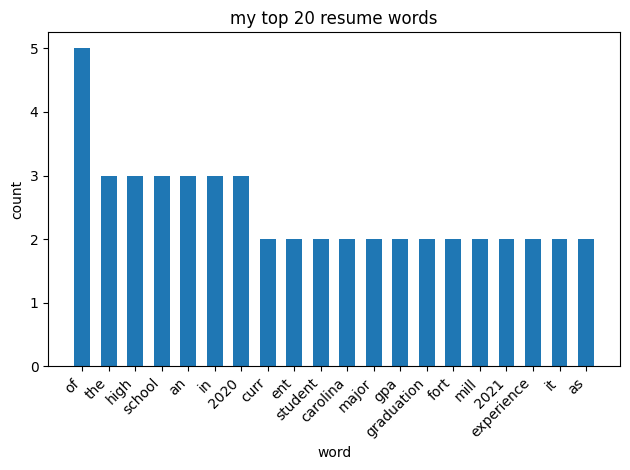

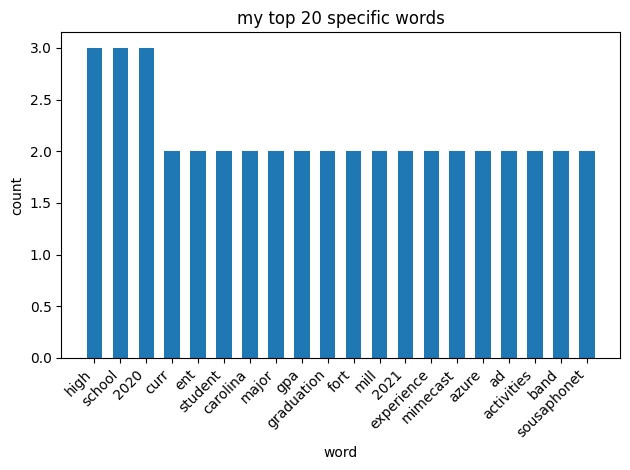

Retrieving folder contents


Processing file 19UEYAqforRFDEwX1NuQGc6uNLOo8zkVI Aashish Jayapuram Resume_Revised.pdf
Processing file 1zu5mNGLDYmWVEuk8K0pqmip_18t1owIy AidanVanVoorhis_2025_Resume.pdf
Processing file 1KmRK-Ih_pIESFKaerwS-JOWU9TZWCoC7 Ardoine_Docteur_Resume.pdf
Processing file 1mGuYkuPYNs3h3WQVe79iiXFocKsXhVjq Camron Martin Resume.pdf
Processing file 1dNORwUBsXKnITH0H1RAg1mxyJikMVuqG Charlie Gorman Resume 2025.pdf
Processing file 1ImW6c5f2T62YKXqns59vlOcci8OHO4kz Cody Miller - Resume.pdf
Processing file 1BKt0nTyDV7pXcZmVgMEUcvCM2eyCDE5N Copy of Nathan Nicodin Resume.pdf
Processing file 10J6BZDZrC2dxEEfAK40myVW5bjRxvSYP David_Dinh_Resume_2026WOGPA.pdf
Processing file 15rp54TE62fk0BchfbuGkOSqk_78sMdUZ DJ Ravenell’s Resume.pdf
Processing file 1KvrpYO8NhQwYsoZ9u3nLcw0RzD4fVAIu Dustin_McDowell_Resume.pdf
Processing file 1R5vGipAoz5KbTnFYuyO5qwBDOZo8R-Ba Eli_Hatcher_resume.pdf
Processing file 1pUQf61wfrJpnLVuMr-ntAywfME_31jMu FINAL Resume- IT Intership.pdf
Processing file 1ZcEXTIM4TnlZ3bRAo2cw-9GEhuAJLEvk J

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=19UEYAqforRFDEwX1NuQGc6uNLOo8zkVI
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_downloads/Aashish Jayapuram Resume_Revised.pdf
100%|██████████| 311k/311k [00:00<00:00, 3.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zu5mNGLDYmWVEuk8K0pqmip_18t1owIy
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_downloads/AidanVanVoorhis_2025_Resume.pdf
100%|██████████| 251k/251k [00:00<00:00, 2.99MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KmRK-Ih_pIESFKaerwS-JOWU9TZWCoC7
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_downloads/Ardoine_Docteur_Resume.pdf
100%|██████████| 151k/151k [00:00<00:00, 2.47MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mGuYkuPYNs3h3WQVe79iiXFocKsXhVjq
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_downloads/Camron Martin Resume.pdf
100%|████

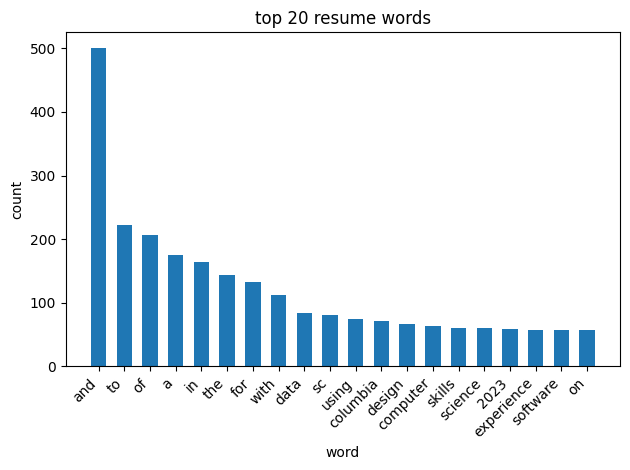

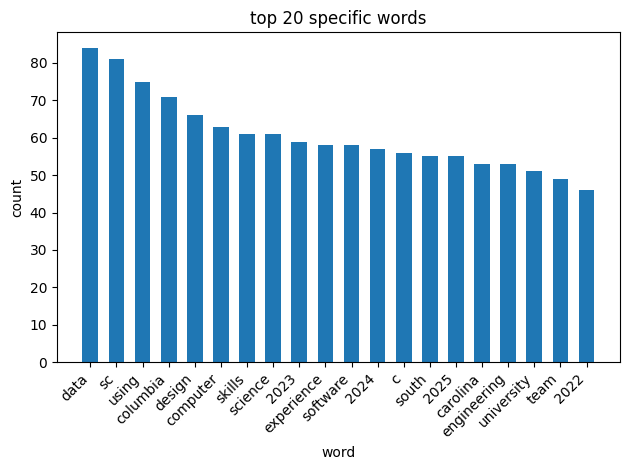

In [2]:
import gdown
import os
import PyPDF2
import re
import matplotlib.pyplot
import numpy
from collections import Counter
import requests

my_resume_path = 'Resume.pdf'
folder_url = 'https://drive.google.com/drive/folders/1F6HRaliFWcakVvT605m8Js6a1D40Tx24?usp=sharing'
stop_words_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"

response = requests.get(stop_words_url)
stop_words = response.text.splitlines()

all_text = ""

try:
    pdf_reader = PyPDF2.PdfReader(my_resume_path)
    for page in pdf_reader.pages:
        all_text += page.extract_text() or ""

except Exception as e:
    print(f"Error processing '{file_name}': {e}")
        
if all_text:
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text).lower()
    words = cleaned_text.split()

    resume_words = Counter(words)
    
    resume_words_word = []
    resume_words_count = []

    for word, count in resume_words.most_common(20):
        resume_words_word.append(word)
        resume_words_count.append(count)

    matplotlib.pyplot.bar(resume_words_word, resume_words_count, width=0.6)
    matplotlib.pyplot.xlabel('word')
    matplotlib.pyplot.ylabel('count')
    matplotlib.pyplot.title('my top 20 resume words')
    matplotlib.pyplot.xticks(rotation=45, ha='right')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

    specific_words = Counter()
    
    for word, count in resume_words.items():
        if word not in stop_words:
            specific_words[word] += count

    specific_words_word = []
    specific_words_count = []

    for word, count in specific_words.most_common(20):
        specific_words_word.append(word)
        specific_words_count.append(count)

    matplotlib.pyplot.bar(specific_words_word, specific_words_count, width=0.6)
    matplotlib.pyplot.xlabel('word')
    matplotlib.pyplot.ylabel('count')
    matplotlib.pyplot.title('my top 20 specific words')
    matplotlib.pyplot.xticks(rotation=45, ha='right')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

temp_dir = 'temp_downloads'
os.makedirs(temp_dir, exist_ok=True)

try:
    gdown.download_folder(folder_url, output=temp_dir, quiet=False)
except Exception as e:
    print(f"Error downloading folder: {e}")

pdf_files = [f for f in os.listdir(temp_dir) if f.endswith('.pdf')]

if not pdf_files:
    print("No PDF files found in the downloaded folder.")
else:
    for file_name in pdf_files:
        local_file_path = os.path.join(temp_dir, file_name)

        try:
            pdf_reader = PyPDF2.PdfReader(local_file_path)
            for page in pdf_reader.pages:
                all_text += page.extract_text() or ""

        except Exception as e:
            print(f"Error processing '{file_name}': {e}")
            
    if all_text:
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text).lower()
        words = cleaned_text.split()

        resume_words = Counter(words)
        
        resume_words_word = []
        resume_words_count = []

        for word, count in resume_words.most_common(20):
            resume_words_word.append(word)
            resume_words_count.append(count)

        matplotlib.pyplot.bar(resume_words_word, resume_words_count, width=0.6)
        matplotlib.pyplot.xlabel('word')
        matplotlib.pyplot.ylabel('count')
        matplotlib.pyplot.title('top 20 resume words')
        matplotlib.pyplot.xticks(rotation=45, ha='right')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()

        specific_words = Counter()
        
        for word, count in resume_words.items():
            if word not in stop_words:
                specific_words[word] += count

        specific_words_word = []
        specific_words_count = []

        for word, count in specific_words.most_common(20):
            specific_words_word.append(word)
            specific_words_count.append(count)

        matplotlib.pyplot.bar(specific_words_word, specific_words_count, width=0.6)
        matplotlib.pyplot.xlabel('word')
        matplotlib.pyplot.ylabel('count')
        matplotlib.pyplot.title('top 20 specific words')
        matplotlib.pyplot.xticks(rotation=45, ha='right')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
    else:
        print("No text was extracted from the PDFs.")

    if os.path.exists(temp_dir):
        for f in os.listdir(temp_dir):
            os.remove(os.path.join(temp_dir, f))
        os.rmdir(temp_dir)

Q2 Text Answers
Task 1: Words like mimecast, azure, and band are emerging now that I filtered out the common stop words. It was helpful to remove the stop words
Task 2: Words like South Carolina, Engineering, and University are ermeging now since I filtered out the common stop words. It was helpful to remove the stop words.
Task 3: High School, 2020, student, fortmill, mimecast, azure, band, and sousaphone are unique to me
